In [1]:
from __future__ import print_function

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import pandas as pd
import tensorflow as tf
from os.path import join, exists, expanduser
from keras.layers import Flatten, Dense, Dropout, Reshape, Permute, Activation, \
    Input, merge, Lambda
print(torch.__version__)

0.4.1


Using TensorFlow backend.


In [4]:
use_cuda = torch.cuda.is_available()

In [5]:
from dataset import dataset
from AlexNet import AlexNet
from train_test import start_train_test

In [6]:
trainloader, validateloader, testloader, outputs, inputs = dataset('dog-breed')
print ('Output classes: {}\nInput channels: {}'.format(outputs, inputs))

| Preparing dog-breed dataset...
Dataset ImageFolder
    Number of datapoints: 10222
    Root Location: ./data/train
    Transforms (if any): Compose(
                             Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
                             RandomCrop(size=(32, 32), padding=4)
                             ToTensor()
                         )
    Target Transforms (if any): None
Output classes: 120
Input channels: 3


In [7]:
print(len(trainloader))

28


In [8]:
print(len(validateloader))

12


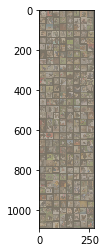

In [11]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputdata, classes = next(iter(trainloader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputdata)

imshow(out)


In [12]:
net = AlexNet(num_classes = outputs, inputs=inputs)
file_name = 'alexnet-'

In [13]:
if use_cuda:
    net.cuda()
    net = torch.nn.DataParallel(net, device_ids=range(torch.cuda.device_count()))
    cudnn.benchmark = True

In [14]:
criterion = nn.CrossEntropyLoss()

In [17]:
train_loss,train_prodicted, test_loss,test_prodicted = start_train_test(net, trainloader, validateloader, criterion)


=> Training Epoch #1, LR=0.0010
| Epoch [  1/ 10] 		Loss: 4.7936 Acc@1: 1.000%

| Validation Epoch #1			Loss: 4.7914 Acc@1: 0.00%
* Test results : Acc@1 = 1.00%
| Elapsed time : 0:01:09

=> Training Epoch #2, LR=0.0010
| Epoch [  2/ 10] 		Loss: 4.7825 Acc@1: 1.000%

| Validation Epoch #2			Loss: 4.7837 Acc@1: 0.00%
* Test results : Acc@1 = 1.00%
| Elapsed time : 0:02:14

=> Training Epoch #3, LR=0.0010
| Epoch [  3/ 10] 		Loss: 4.7765 Acc@1: 1.000%

| Validation Epoch #3			Loss: 4.7922 Acc@1: 1.00%
* Test results : Acc@1 = 1.00%
| Elapsed time : 0:03:22

=> Training Epoch #4, LR=0.0010
| Epoch [  4/ 10] 		Loss: 4.7768 Acc@1: 1.000%

| Validation Epoch #4			Loss: 4.7859 Acc@1: 0.00%
* Test results : Acc@1 = 1.00%
| Elapsed time : 0:04:27

=> Training Epoch #5, LR=0.0010
| Epoch [  5/ 10] 		Loss: 4.7700 Acc@1: 1.000%

| Validation Epoch #5			Loss: 4.7836 Acc@1: 0.00%
* Test results : Acc@1 = 1.00%
| Elapsed time : 0:05:36

=> Training Epoch #6, LR=0.0010
| Epoch [  6/ 10] 		Loss: 4.7696

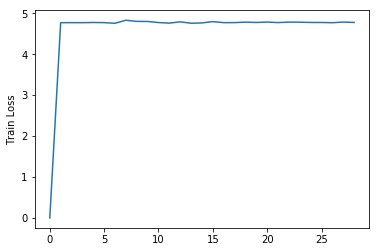

[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]


In [16]:
plt.plot(train_loss)
plt.ylabel('Train Loss')
plt.show()
print(train_prodicted)

In [ ]:
plt.plot(test_loss)
plt.ylabel('Test Loss')
plt.show()